<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

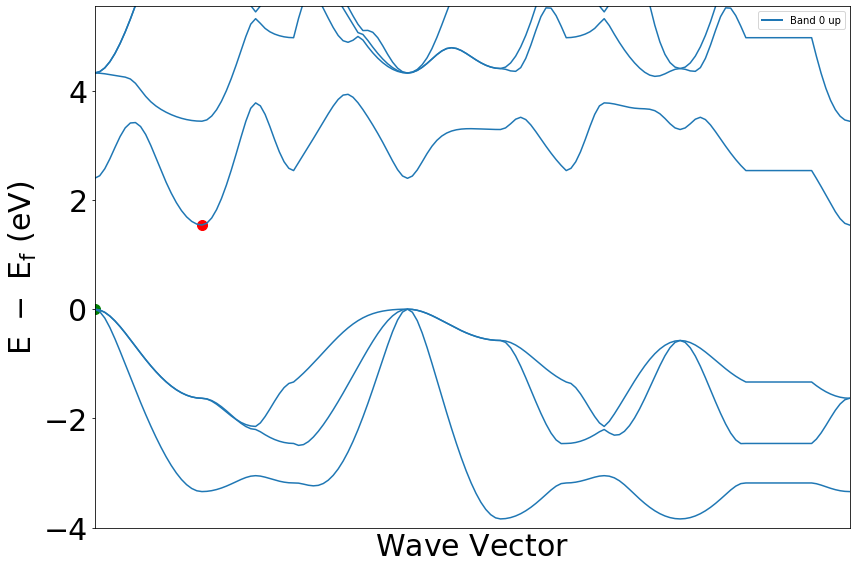

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sc
import matplotlib.image as mpimg
from pymatgen.electronic_structure.core import Spin
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import *

with MPRester ("hGWi2mG3AMC2JfpV0r") as m:
    
    bs = m.get_bandstructure_by_material_id("mp-36111")
    
s_b = m.get_bandstructure_by_material_id("mp-36111")
gap_band= s_b.get_band_gap()
plotter = BSPlotter(s_b)

plotter.get_plot(vbm_cbm_marker = True)


    
    


On remarque que le point le plus haut de la bande de valence (vert) et le point le plus bas de la bande de conduction (rouge) ne sont pas alignés cad que nous avons un gap indirect.


# Déterminer bande interdite

In [2]:
gap = s_b.get_band_gap()

print("Bande interdite est indirecte et le gap est de ", gap['energy'], "eV")

Bande interdite est indirecte et le gap est de  1.5391000000000004 eV


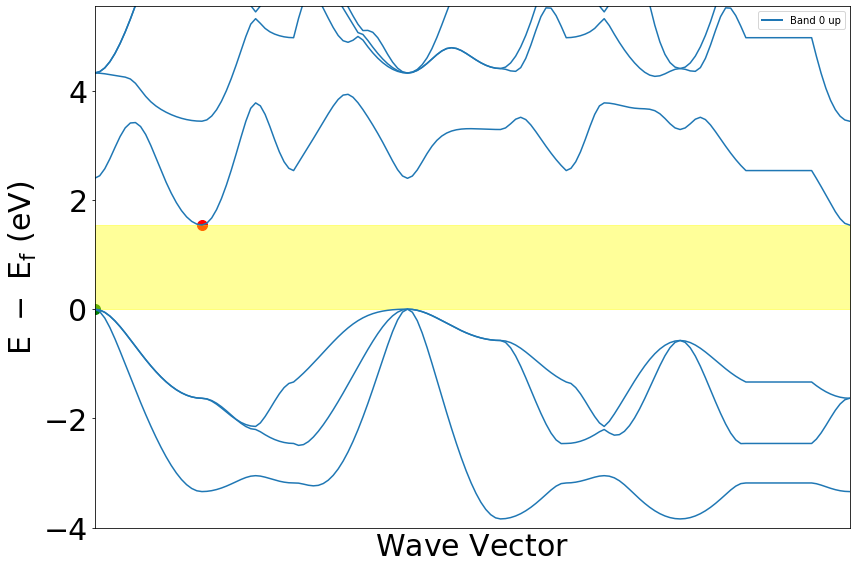

In [3]:
BSplot = BSPlotter(s_b)
BSplot.get_plot(vbm_cbm_marker=True)

x = np.linspace(0.0, 8, 100)
plt.fill_between(x, 0.0, 1.53710000000000004, color="yellow", alpha=0.4)



On peut voir sur le graphique la bande interdite en jaune

# Directions de dispersion 

In [11]:
dist = plotter.bs_plot_data()['ticks']['distance']
index_valence = list(bs.get_vbm()['band_index'].values())[0][-1]
index_conduction = list(bs.get_cbm()['band_index'].values())[0][0]
valence_band = list(bs.bands.values())[0][index_valence]
conduction_band = list(bs.bands.values())[0][index_conduction]
i = 0
j = 0
valence_slopes = []
conduction_slopes = []
valence_vals = []
conduction_vals = []
labels = []
x = []
for point in bs.kpoints:
    if point.label is not None and i != 125 :
        if (len(labels) == 0 or labels[-1] != point.label):
            valence_vals.append(valence_band[i]-bandstructure.efermi)
            conduction_vals.append(conduction_band[i]-bandstructure.efermi)
            if len(valence_vals) > 1 :
                valence_slopes.append(abs((valence_vals[-1] - valence_vals[-2])/(dist[j]-dist[j-1])))
                conduction_slopes.append(abs((conduction_vals[-1] - conduction_vals[-2])/(dist[j]-dist[j-1])))
            labels.append(point.label)
            x.append(dist[j])
        j+=1
    elif i == 125 :
        labels[1] = 'K$\\mid$U'
    i+=0
    



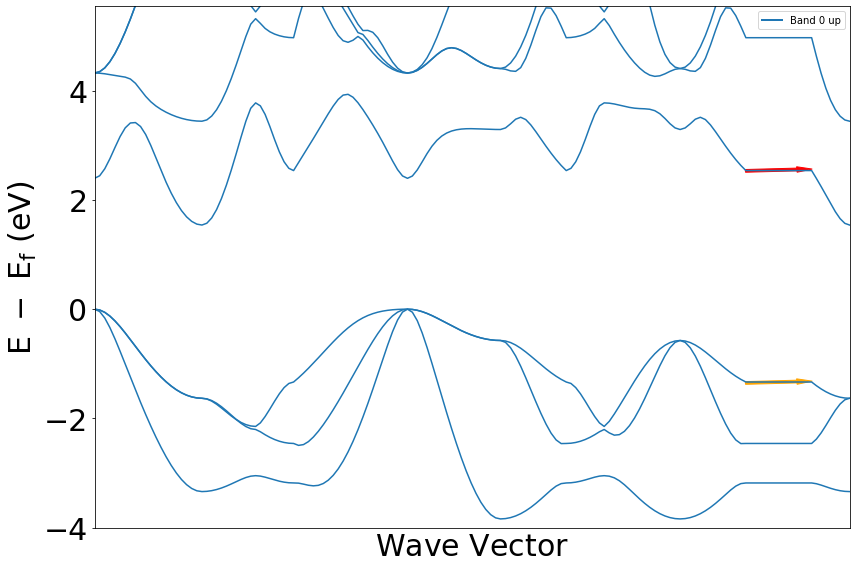

In [54]:
plotter.get_plot()
plt.arrow(6.33,2.53,0.65,0.0331,width = 0.05,head_width=0.1,length_includes_head=True, color='red')
plt.arrow(6.33,-1.35,0.65,0.0331,width = 0.05,head_width=0.1,length_includes_head=True, color='orange')
#plt.arrow(x[conduction_disp_max_index],shift+conduction_vals[conduction_disp_max_index],x[conduction_disp_max_index+1]-x[conduction_disp_max_index],conduction_vals[conduction_disp_max_index+1]-conduction_vals[conduction_disp_max_index],head_width=0.1,length_includes_head=True, color='green')
#plt.arrow(x[conduction_disp_min_index],shift+conduction_vals[conduction_disp_min_index],x[conduction_disp_min_index+1]-x[conduction_disp_min_index],conduction_vals[conduction_disp_min_index+1]-conduction_vals[conduction_disp_min_index],head_width=0.1,length_includes_head=True, color='magenta')
plt.show()